In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Antenna patterns

In [2]:
T=3 #year
sampleFreq=10000
t=np.arange(0,T,1/sampleFreq) #generate a time array
alpha=2*np.pi*t #factor related to satelites positions

In [3]:
def unitVec(alpha):
    n1=np.array([np.cos(alpha),np.sin(alpha),0])
    n2=np.array([np.cos(alpha)+np.pi/3,np.sin(alpha)+np.pi/3,0])
    n3=np.array([np.cos(alpha)+2*np.pi/3,np.sin(alpha)+2*np.pi/3,0])
    return [n1,n2,n3]

In [4]:
def DetTensor(n,DChannel):
    #Calculating the tensor of detector
    
    n=nNorm(n)
    n1=n[0]
    n2=n[1]
    n3=n[2]
    if DChannel==1:
        D=1/2*(np.outer(n1,n1)-np.outer(n2,n2))
    elif DChannel==2:
        D=1/(2*np.sqrt(3))*(np.outer(n1,n1)+np.outer(n2,n2)-2*np.outer(n3,n3))
    else:
        raise ValueError('Number of theta and phi must be the same')
    return D

In [5]:
def DetFrame3(n):
    #Calculating the unit vectors of orthogonal coordinate system of detectors
    
    n1=n[0]
    n2=n[1]
    n3=n[2]
    x_hat=n1-n3
    x_hat=x_hat/np.linalg.norm(x_hat)
    z_hat=np.cross(n1,n2)
    z_hat=z_hat/np.linalg.norm(z_hat)
    y_hat=np.cross(z_hat,x_hat)
    return x_hat,y_hat,z_hat

In [6]:
def nNorm(n):
    #Normalise the vectors of the arms
    
    n1=n[0]
    n2=n[1]
    n3=n[2]
    n1=n1/np.linalg.norm(n1)
    n2=n2/np.linalg.norm(n2)
    n3=n3/np.linalg.norm(n3)
    return [n1,n2,n3]

In [7]:
def FpFc3(Theta,Phi,psi,n,DChannel):
    #Calculating F_plus and F_cross, the algorithm is alike to LIGO
    
    n=nNorm(n)
    n1=n[0]
    n2=n[1]
    n3=n[2]
        
    vec2Src = np.array([np.sin(Theta)*np.cos(Phi),np.sin(Theta)*np.sin(Phi),np.cos(Theta)])
    R=np.array([[np.cos(psi),np.sin(psi),0],[-np.sin(psi),np.cos(psi),0],[0,0,1]])

    vec2Src=np.dot(R,vec2Src)

    x_axis,y_axis,z_axis = DetFrame3(n)
    xVec = np.cross(z_axis,vec2Src)
    yVec = np.cross(xVec,vec2Src)
    
    xVec = xVec/np.linalg.norm(xVec)
    yVec = yVec/np.linalg.norm(yVec)

    ex = np.array([[1,0,0]]).T
    ey = np.array([[0,1,0]]).T
    detTensor = DetTensor(n,DChannel)

    wave_plus = np.outer(xVec,xVec)-np.outer(yVec,yVec)
    fPlus = np.sum(detTensor*wave_plus)

    wave_cross = np.outer(xVec,yVec)+np.outer(yVec,xVec)
    fCross = np.sum(detTensor*wave_cross)

    return fPlus, fCross

In [8]:
def sigFig(h,time,title):
    #define a function to plot antenna response or signal
    
    plt.figure(figsize=(16,8))
    plt.plot(time,h,
             marker='.',
             markersize=1,
             linestyle='None')
    plt.xlabel('Time')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [9]:
L=np.sqrt(3) #length of an arm, unit: 10^5 km

theta_test = np.pi/3 #polar angle of the GW sourse in SSB
phi_test = 3*np.pi/4 #azimuthal angle of the GW sourse in SSB

In [10]:
fPlusVec1=np.zeros_like(t)
fCrossVec1=np.zeros_like(t)
fPlusVec2=np.zeros_like(t)
fCrossVec2=np.zeros_like(t)
psi_test=0 #polarization angle
for tindex in range(len(t)):
    n=unitVec(alpha[tindex])
    fPlusVec1[tindex],fCrossVec1[tindex]=FpFc3(theta_test,phi_test,psi_test,n,1)
    fPlusVec2[tindex],fCrossVec2[tindex]=FpFc3(theta_test,phi_test,psi_test,n,2)
    #Calculating antenna response

/var/folders/hk/j8nb1vq52gxf1m11l0vp5yww0000gn/T/ipykernel_61732/4060770245.py:10: RuntimeWarning: invalid value encountered in divide
  z_hat=z_hat/np.linalg.norm(z_hat)


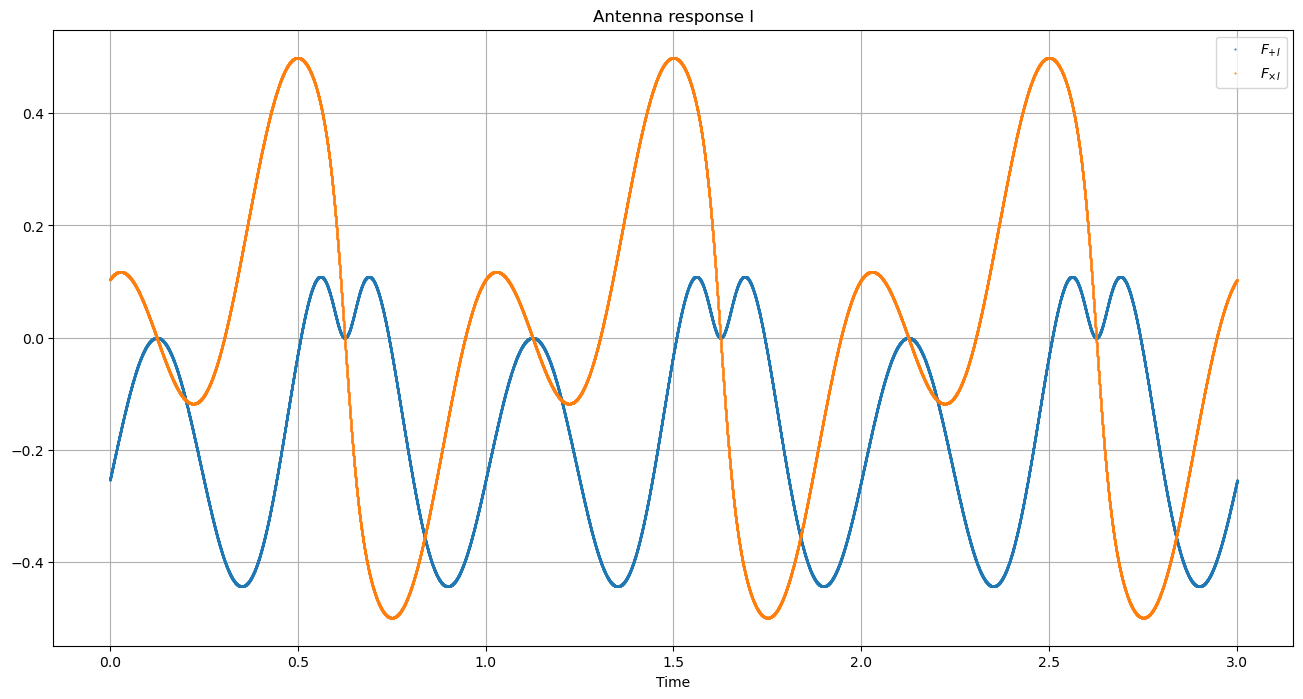

In [11]:
#Plotting antenna response of Channel I 

plt.figure(figsize=(16,8))
plt.plot(t,fPlusVec1,label=r'$F_{+I}$',marker='.',markersize=1,linestyle='None')
plt.plot(t,fCrossVec1,label=r'$F_{\times I}$',marker='.',markersize=1,linestyle='None')
plt.xlabel('Time')
plt.title('Antenna response I')
plt.grid(True)
plt.legend()
plt.show()

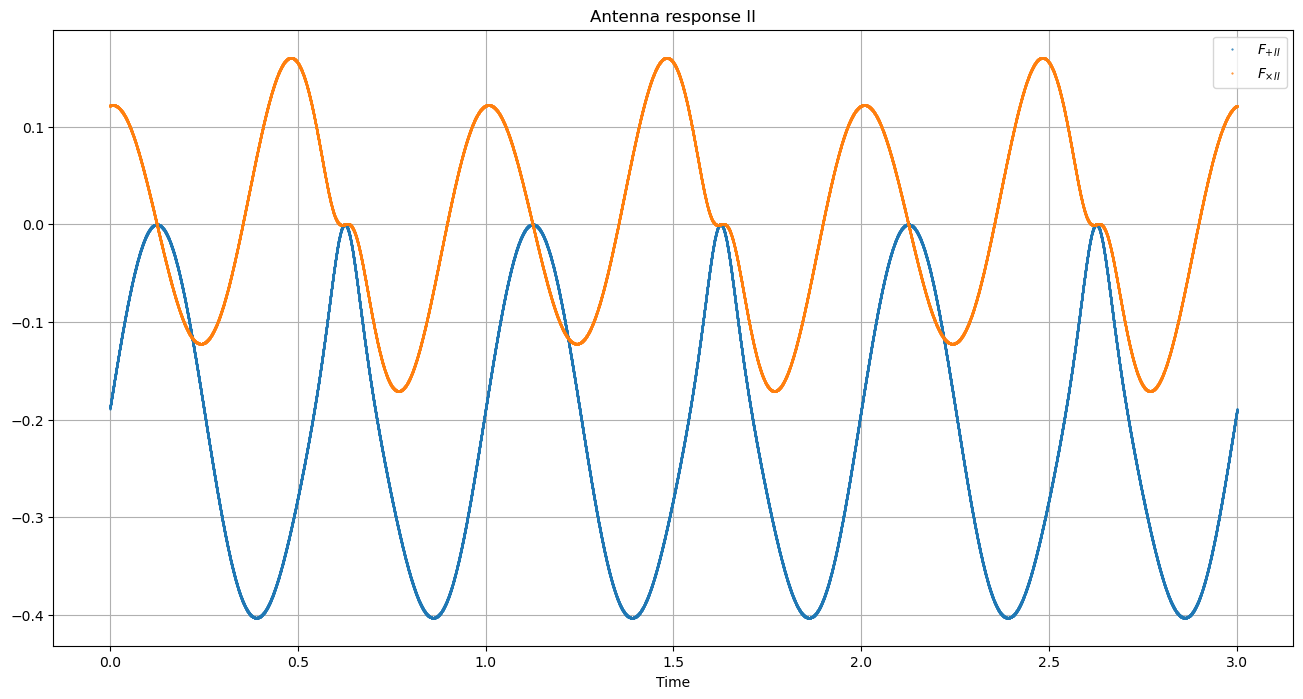

In [12]:
#Plotting antenna response of Channel II

plt.figure(figsize=(16,8))
plt.plot(t,fPlusVec2,label=r'$F_{+II}$',marker='.',markersize=1,linestyle='None')
plt.plot(t,fCrossVec2,label=r'$F_{\times II}$',marker='.',markersize=1,linestyle='None')
plt.xlabel('Time')
plt.title('Antenna response II')
plt.grid(True)
plt.legend()
plt.show()

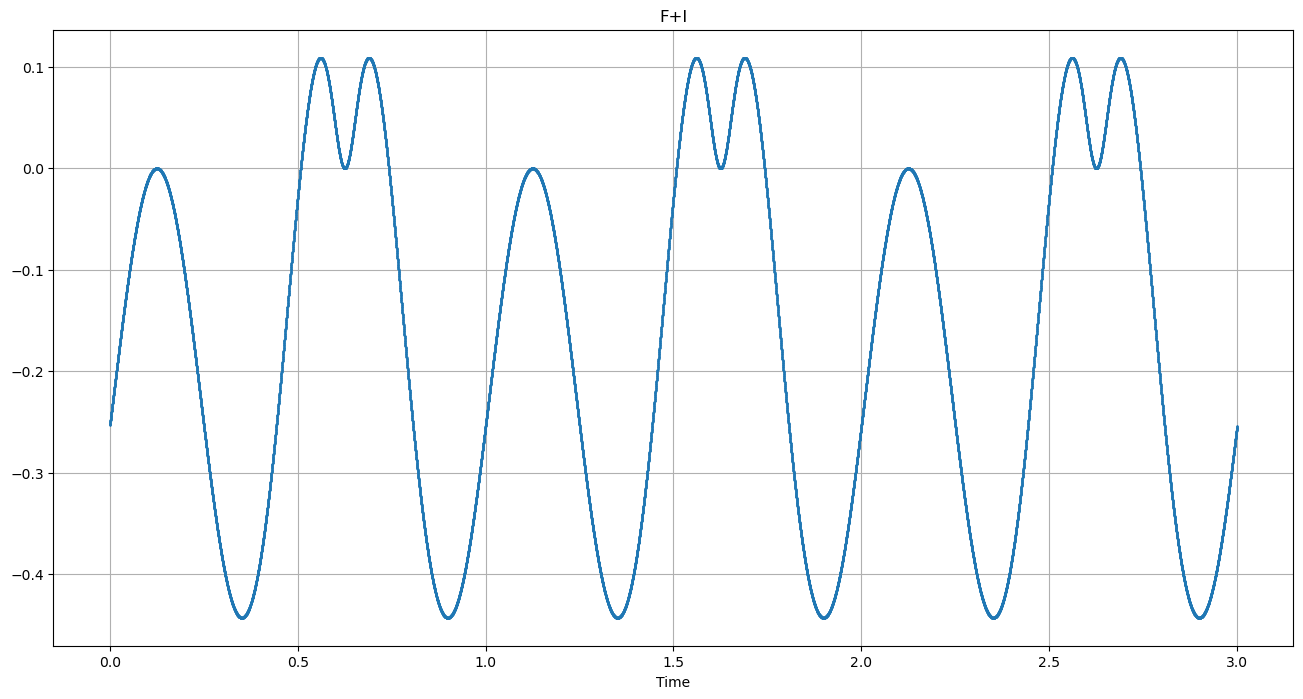

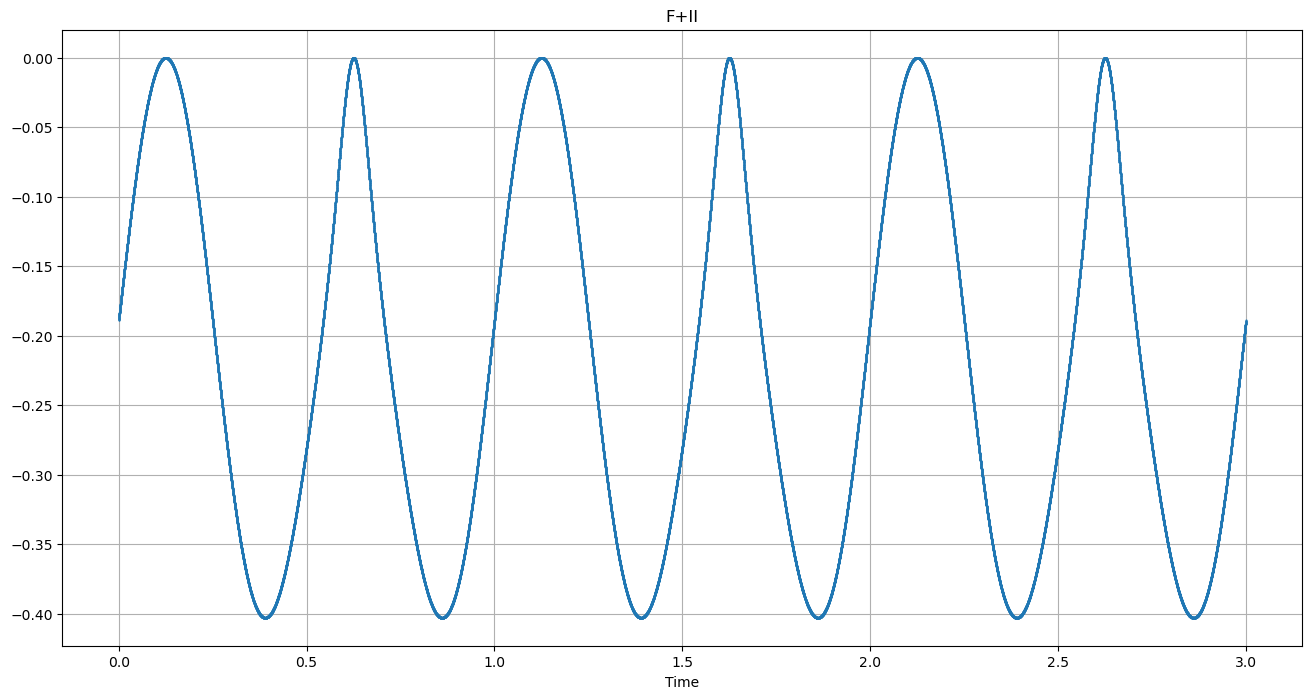

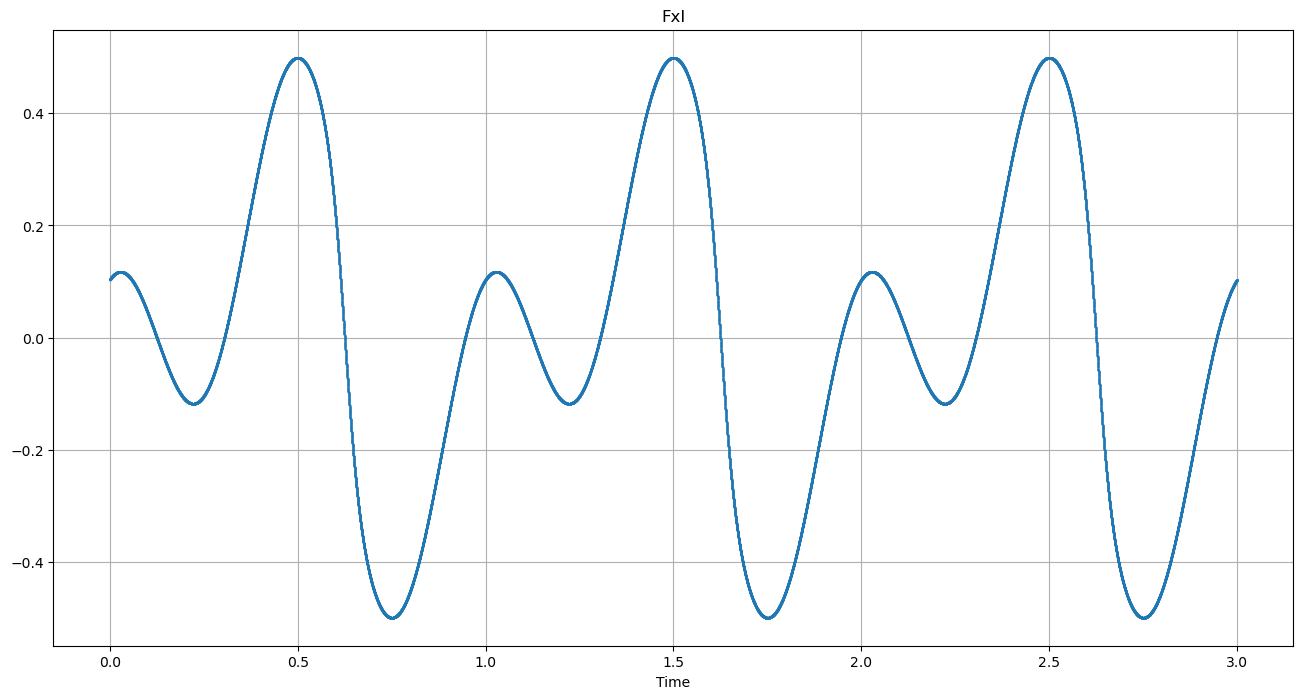

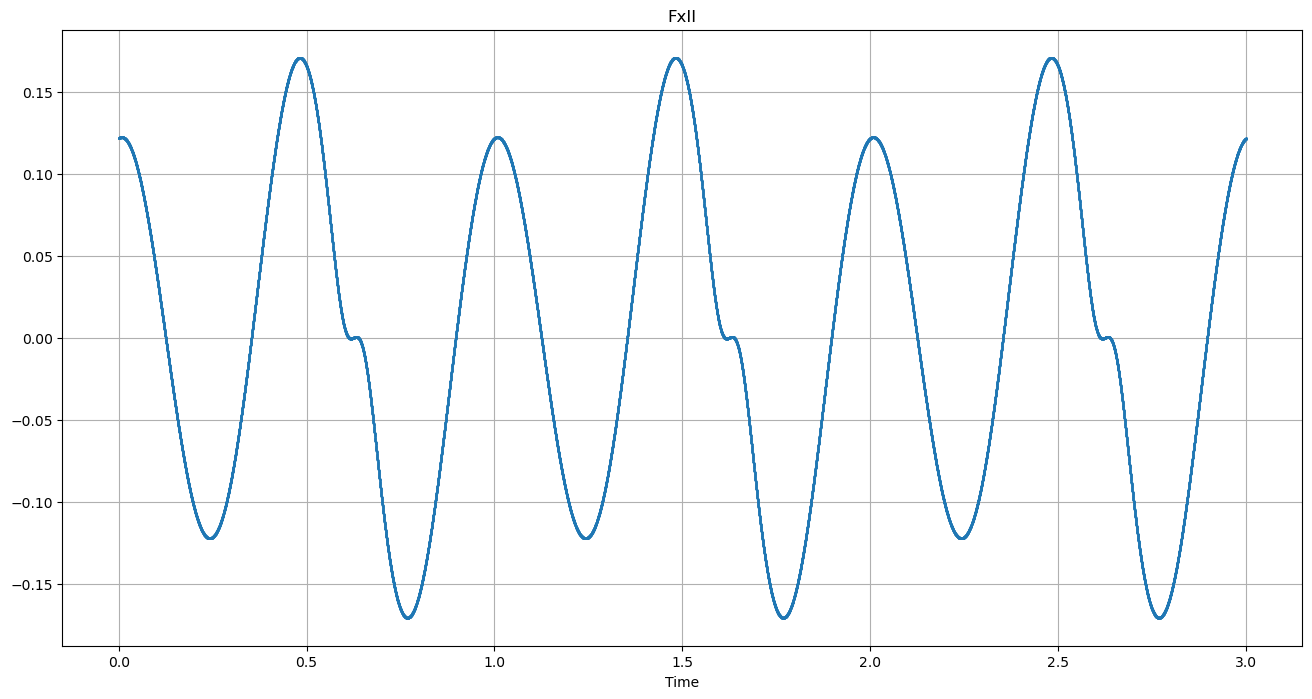

In [13]:
#Plotting antenna response respectively 

sigFig(fPlusVec1,t,'F+I')
sigFig(fPlusVec2,t,'F+II')
sigFig(fCrossVec1,t,'FxI')
sigFig(fCrossVec2,t,'FxII')

## 2. Toy TianQin response: Partial

In [14]:
def gensin(t, A, f0, phi0):
    #Generating a sinusoidal signal
    #Not to be confused with "genshin"
    #t: time
    #A: amplitude
    #f0: frequency
    #phi0: initial phase
    return A * np.sin(2 * np.pi * f0 * t + phi0)

In [15]:
A=10e-20 #amplitude
B=8e-20 #amplitude
f0=30 #frequency of the signal
phi0=np.pi/6 #initial phase of the signal
hPlus=gensin(t,A,f0,0)
hCross=gensin(t,A,f0,phi0)

In [16]:
def signal_t(fPlus,fCross,hPlus,hCross,t):
    #Calculating the detected signal
    signal=np.zeros_like(t)
    for tindex in range(len(t)):
        signal[tindex]=fPlus[tindex]*hPlus[tindex]+fCross[tindex]*hCross[tindex]
    return signal

In [17]:
signal=signal_t(fPlusVec2,fCrossVec2,hPlus,hCross,t)

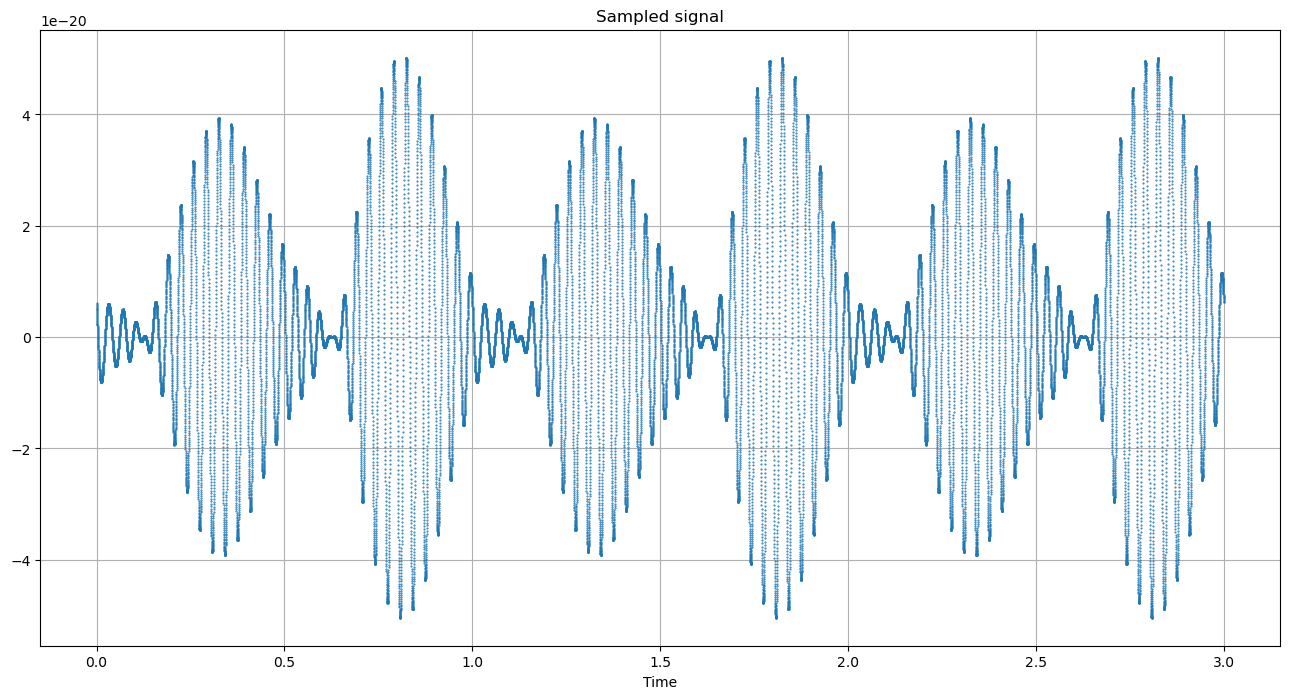

In [18]:
sigFig(signal,t,'Sampled signal')

## 3. Toy TianQin response: Full

In [19]:
a=1 #radius of the earth orbit, unit: AU

#calculating the earth position in SSB
xd,anothermatrix=np.meshgrid(t,np.array([0,0,0]))
xd[0,:]=a*np.cos(alpha)
xd[1,:]=a*np.sin(alpha)
xd[2,:]=0

In [20]:
#vector of wave in SSB
nWave = np.array([np.sin(theta_test)*np.cos(phi_test),np.sin(theta_test)*np.sin(phi_test),np.cos(theta_test)])

In [21]:
c=8532784126468.641509893455099 #speed of the light, unit: AU per year
tDop=t-np.dot(nWave.T,xd)/c #Doppler shift

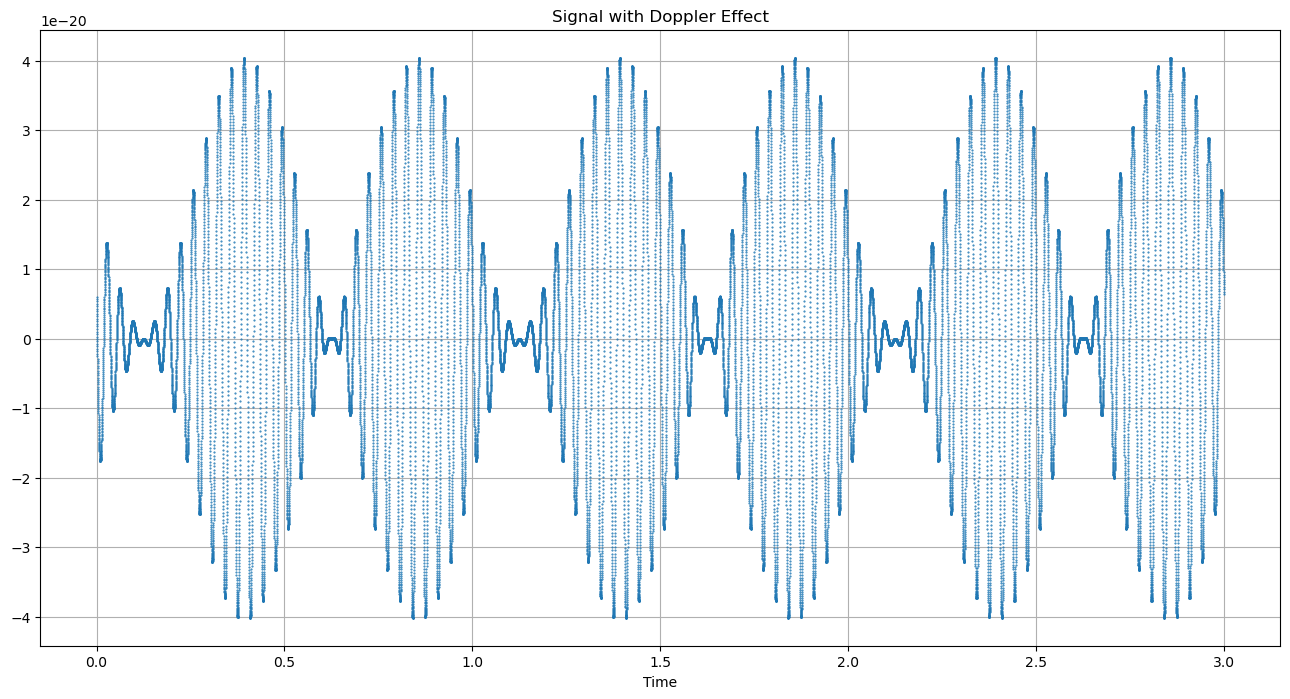

In [22]:
#Generating signals including Doppler shift
hPlusDop=gensin(tDop,A,f0,0)
hCrossDop=gensin(tDop,A/2,f0,np.pi/2)

signal_dop=signal_t(fPlusVec2,fCrossVec2,hPlusDop,hCrossDop,tDop)

sigFig(signal_dop,t,'Signal with Doppler Effect')

## 4. Effect of sky location

In [23]:
theta_test_b=np.pi/4 #polar angle of another GW sourse in SSB
phi_test_b=2*np.pi/3 #azimuthal angle of another GW sourse in SSB

#Calculating antenna response to another GW signal
fPlusVec1b=np.zeros_like(t)
fCrossVec1b=np.zeros_like(t)
fPlusVec2b=np.zeros_like(t)
fCrossVec2b=np.zeros_like(t)
psi_test=0
for tindex in range(len(t)):
    n=unitVec(alpha[tindex])
    fPlusVec1b[tindex],fCrossVec1b[tindex]=FpFc3(theta_test_b,phi_test_b,psi_test,n,1)
    fPlusVec2b[tindex],fCrossVec2b[tindex]=FpFc3(theta_test_b,phi_test_b,psi_test,n,2)

/var/folders/hk/j8nb1vq52gxf1m11l0vp5yww0000gn/T/ipykernel_61732/4060770245.py:10: RuntimeWarning: invalid value encountered in divide
  z_hat=z_hat/np.linalg.norm(z_hat)


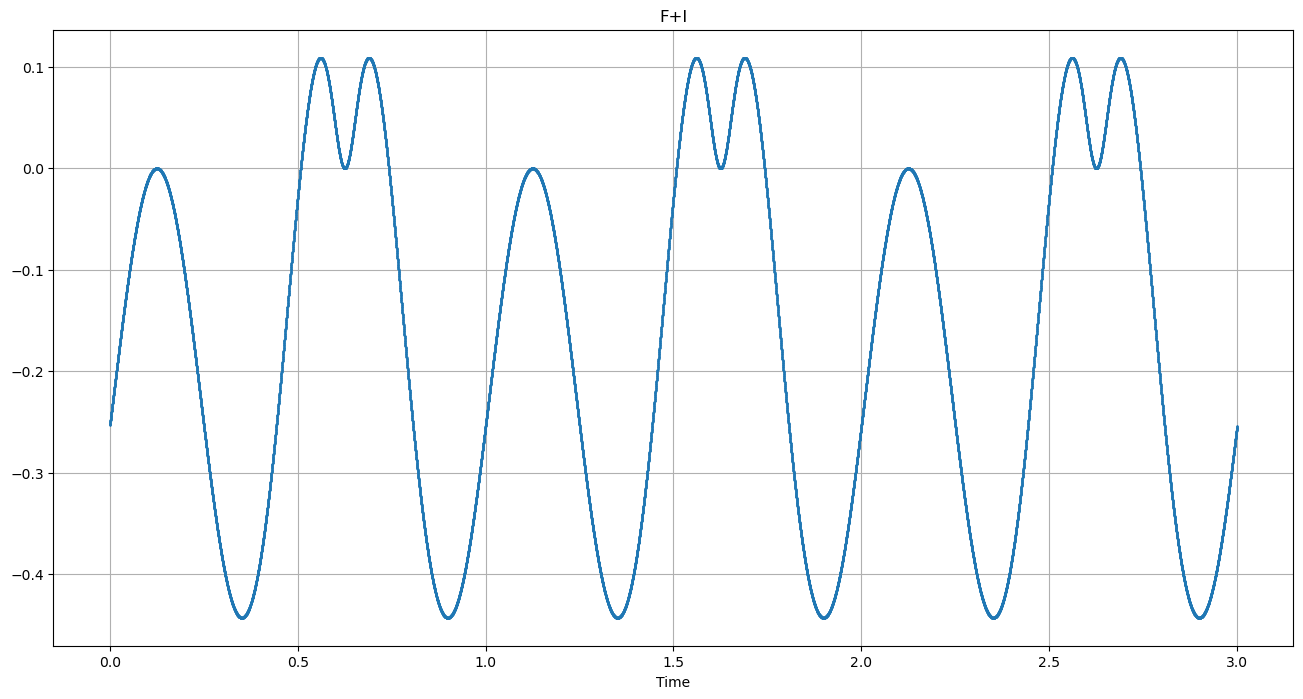

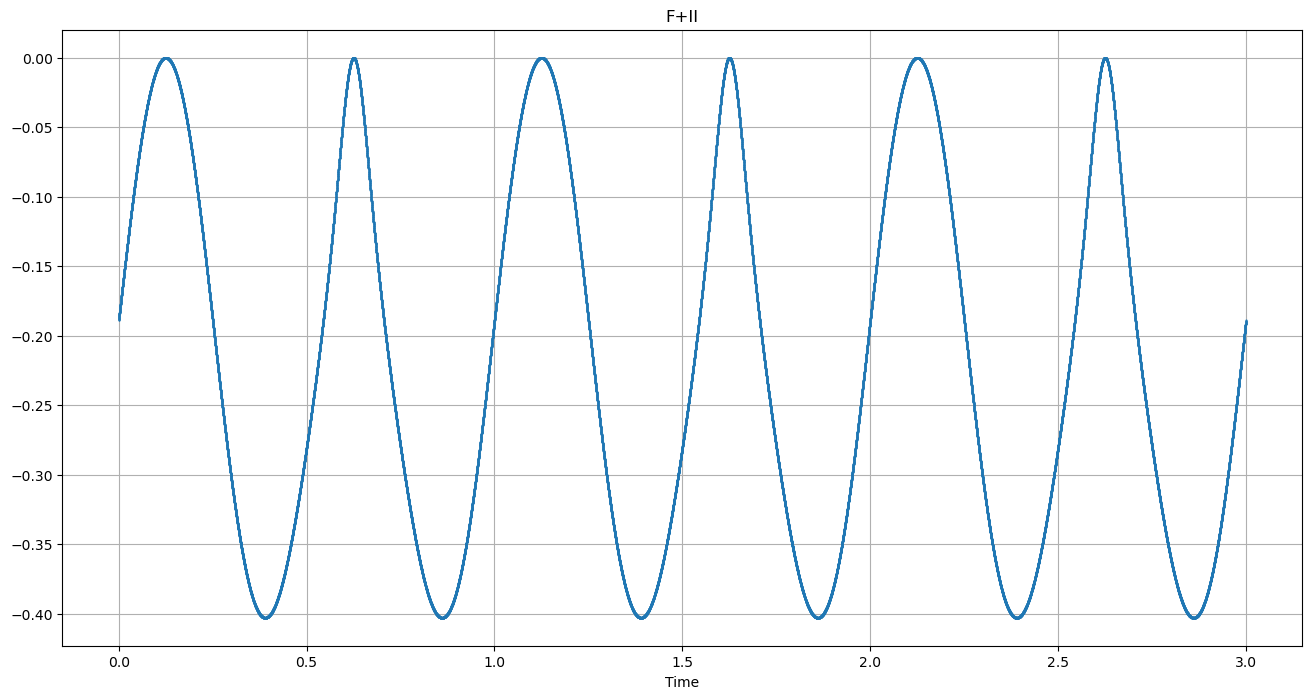

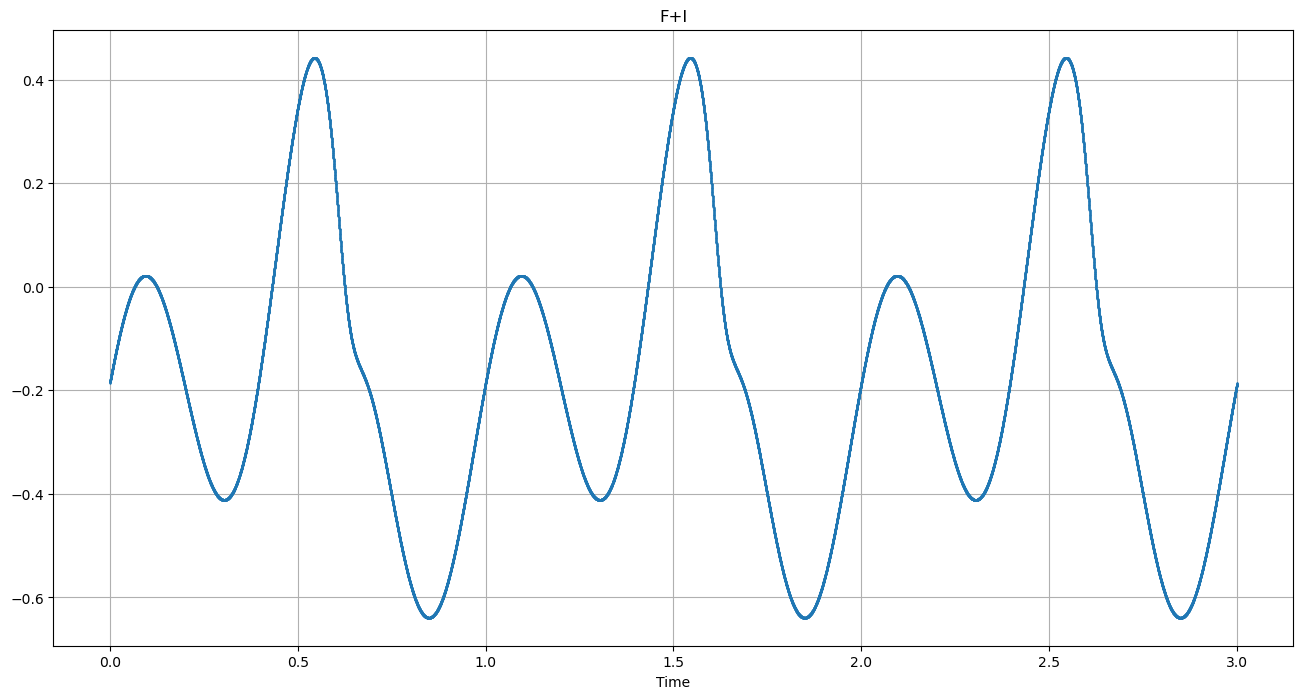

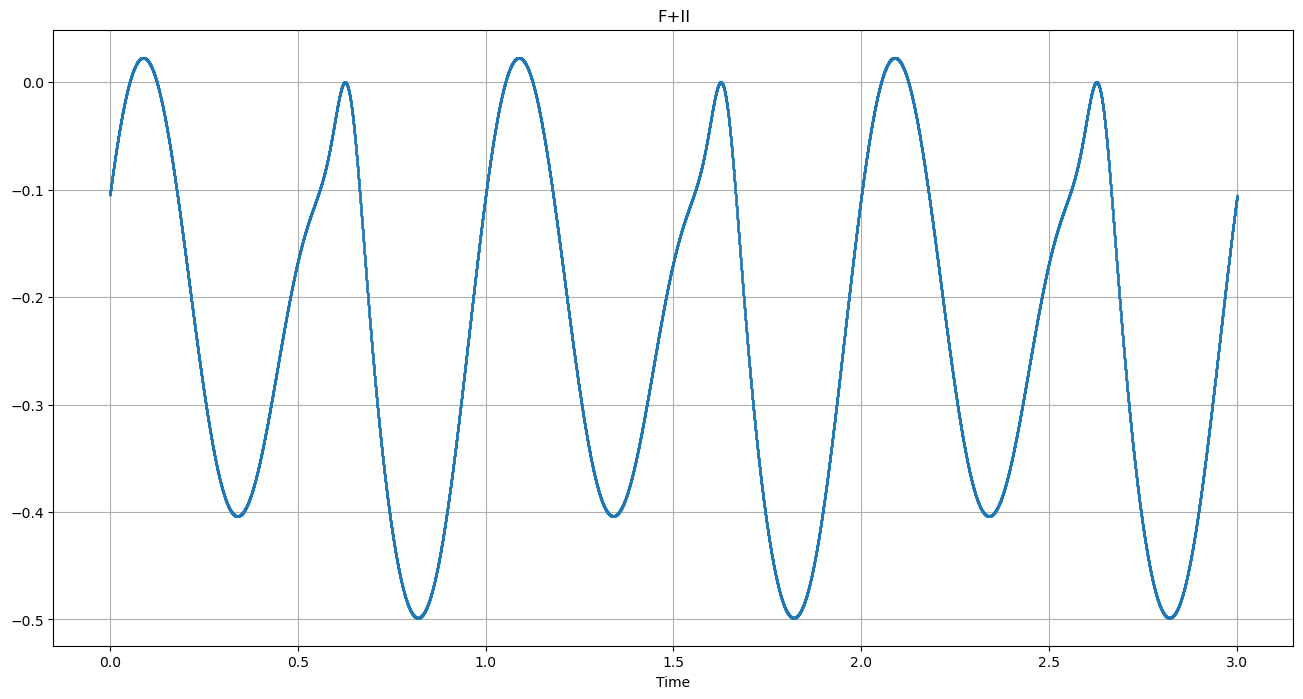

In [24]:
sigFig(fPlusVec1,t,'F+I')
sigFig(fPlusVec2,t,'F+II')
sigFig(fPlusVec1b,t,'F+I')
sigFig(fPlusVec2b,t,'F+II')
#sigFig(fCrossVec1,t)
#sigFig(fCrossVec2,t)

In [25]:
#Calculating the detected signal
signal_b=signal_t(fPlusVec2b,fCrossVec2b,hPlus,hCross,t)

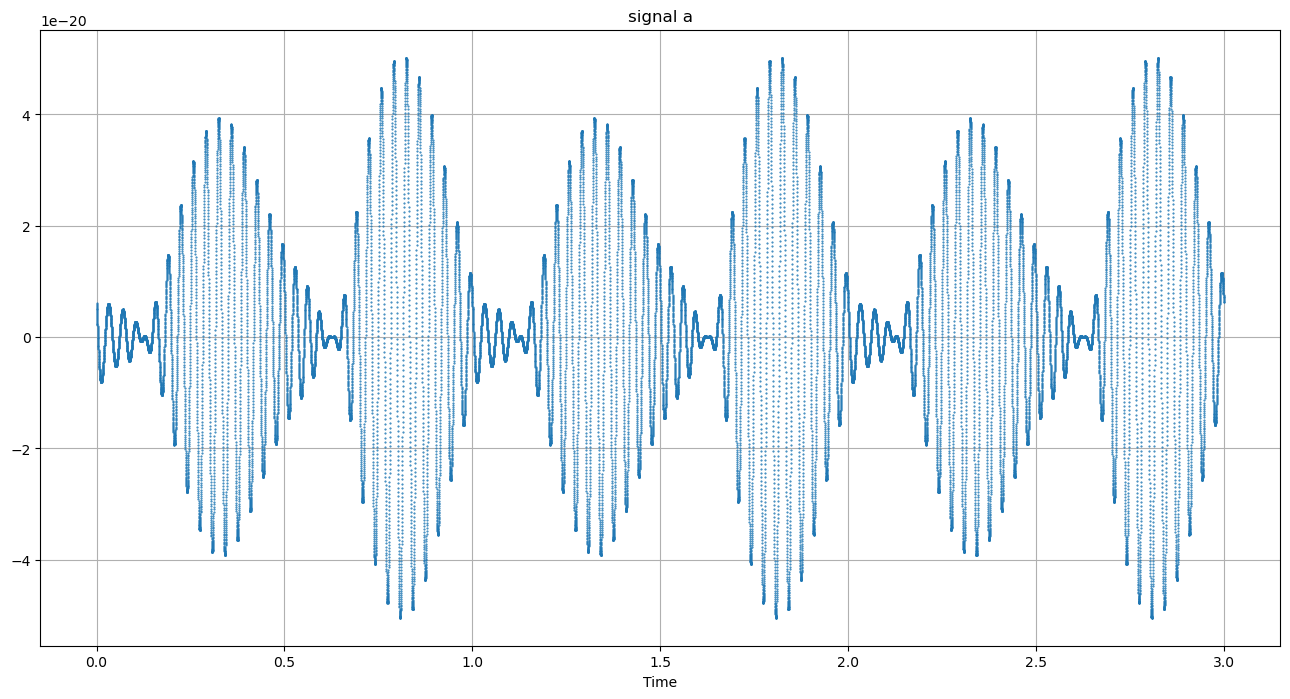

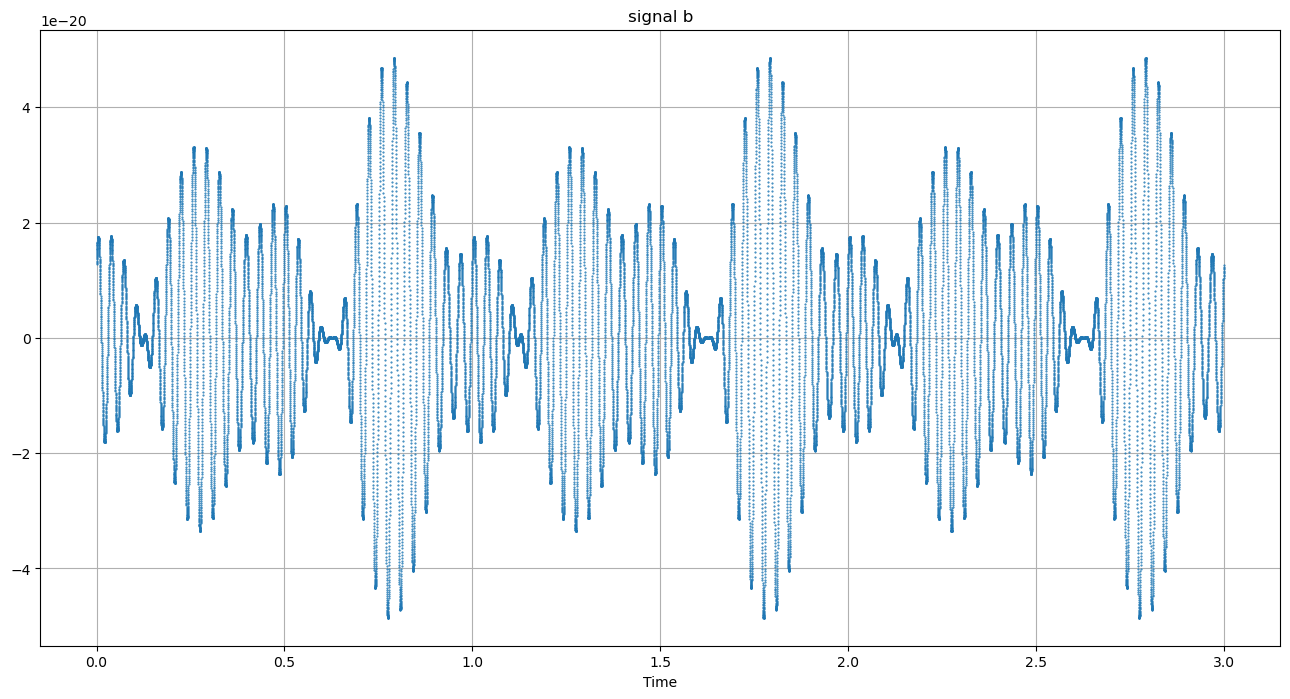

In [26]:
#Plotting two signals respectively
sigFig(signal,t,'signal a')
sigFig(signal_b,t,'signal b')

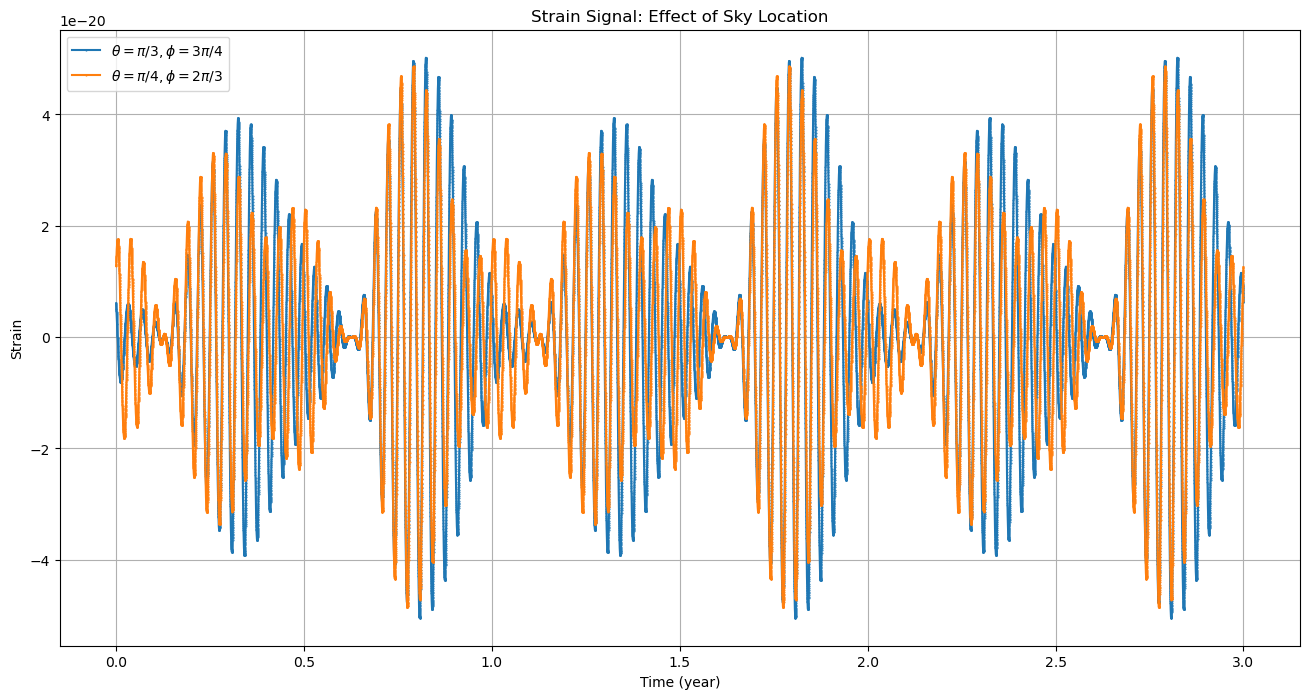

In [27]:
#Plotting two signals togehter
plt.figure(figsize=(16,8))
plt.plot(t,signal,label=r'$\theta=\pi/3,\phi=3\pi/4$',marker='.',markersize=1,linestyle='-')
plt.plot(t,signal_b,label=r'$\theta=\pi/4,\phi=2\pi/3$',marker='.',markersize=1,linestyle='-')
plt.xlabel('Time (year)')
plt.ylabel('Strain')
plt.title('Strain Signal: Effect of Sky Location')
plt.grid(True)
plt.legend()
plt.show()